In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Loading all corr-u*.dat file and importing to pandas dataframe. The loading criteria can be changed by imposing conditions. os.walk() can also be used.

In [2]:
dataframe_list=[]
newdf=[]
for i in range(2):
    read_temp=np.loadtxt('corr-u'+str(i)+'.dat')
    read_temp=pd.DataFrame(read_temp)
    dataframe_list.append(read_temp)
    newdf.append(i)

In [3]:
newdf

[0, 1]

In [4]:
dataframe_list[0]

,0,1
0,2.00,0.035563
1,2.00,0.081781
2,2.00,0.040134
3,2.00,0.081781
4,2.00,0.035563
5,2.24,0.052624
6,2.24,0.055942
7,2.24,0.055942
8,2.24,0.052624
9,2.83,0.007594


Giving column names here :

In [5]:
for i in range(2):
    dataframe_list[i].columns=['distance','correlation']

In [6]:
dataframe_list[0]

,distance,correlation
0,2.00,0.035563
1,2.00,0.081781
2,2.00,0.040134
3,2.00,0.081781
4,2.00,0.035563
5,2.24,0.052624
6,2.24,0.055942
7,2.24,0.055942
8,2.24,0.052624
9,2.83,0.007594


In [7]:
dataframe_list[1]

,distance,correlation
0,1.414214,0.033850
1,1.414214,0.041737
2,1.414214,0.041737
3,1.414214,0.033850
4,2.236068,-0.011678
5,2.236068,-0.025472
6,2.236068,-0.011678
7,3.162278,0.007204
8,3.162278,0.007204
9,4.123106,0.000835


This is an important step. I need to plot graphs of average correlations against particular distances (say distance = 1.414214 or distance = 2.236068 etc) with standard deviation (as an statistical fluctuation). Instead of .describe(), mean() and std() can be used. However .decribe() does an amazing job!

In [8]:
for i in range(2):
    newdf[i]=dataframe_list[i].groupby(['distance'])['correlation'].describe().reset_index()

In the dataframe_list[0], there are only one value for distance = 4.47. The the std returns NAN. So I replaced NAN by 0 using fillna(0). You can remove unnecessary columns by using newdf.drop()

In [9]:
for i in range(2):
    newdf[i]=newdf[i].fillna(0)

In [10]:
newdf[0]

,distance,count,mean,std,min,25%,50%,75%,max
0,2.00,5.0,0.054964,0.024551,0.035563,0.035563,0.040134,0.081781,0.081781
1,2.24,4.0,0.054283,0.001916,0.052624,0.052624,0.054283,0.055942,0.055942
2,2.83,3.0,0.010035,0.004227,0.007594,0.007594,0.007594,0.011255,0.014916
3,3.61,2.0,-0.001778,0.001743,-0.003010,-0.002394,-0.001778,-0.001162,-0.000546
4,4.47,1.0,0.001279,0.000000,0.001279,0.001279,0.001279,0.001279,0.001279


In [11]:
newdf[1]

,distance,count,mean,std,min,25%,50%,75%,max
0,1.414214,4.0,0.037793,0.004554,0.033850,0.033850,0.037793,0.041737,0.041737
1,2.236068,3.0,-0.016276,0.007964,-0.025472,-0.018575,-0.011678,-0.011678,-0.011678
2,3.162278,2.0,0.007204,0.000000,0.007204,0.007204,0.007204,0.007204,0.007204
3,4.123106,2.0,0.001187,0.000498,0.000835,0.001011,0.001187,0.001364,0.001540


In [12]:
list(newdf[1].columns)

['distance', 'count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']

In [13]:
for i in range(2):
    newdf[i].to_csv("store"+str(i)+".csv")

In [14]:
#Now we are ready to plot. I am using a loop to make a single plot from both dataframes. You can customize as you need.

Text(0.5, 1.0, 'Name of the graph')

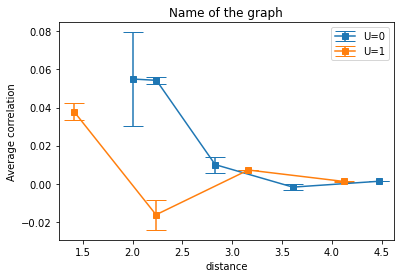

In [15]:
fig,ax=plt.subplots()
for i in range(2):
    ax.errorbar(newdf[i]['distance'],newdf[i]['mean'],newdf[i]['std'], marker='s', capsize=10, label="U="+str(i))
    ax.legend()
plt.xlabel("distance")
plt.ylabel("Average correlation")
plt.title("Name of the graph")

In [16]:
plt.show()